# Decision Tree Classifier 

In [222]:
#importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
# By importing the Above we can avoid using plt.show()

In [223]:
df=pd.read_csv("bank-additional.csv",delimiter=';')
df.rename(columns={'y':'deposit'},inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [224]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [225]:
df.shape
#To Get the Number of Rows and Columns in the Dataset

(4119, 21)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [227]:
df.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

In [228]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

In [229]:
df.duplicated().sum()

0

In [230]:
categorical_cols=df.select_dtypes(include='object').columns
print(categorical_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')


In [231]:
num_cols=df.select_dtypes(exclude='object').columns #Does not removes only Selects dtypes which are not Object
print(num_cols)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [232]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>],
       [<Axes: title={'center': 'cons.price.idx'}>,
        <Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'nr.employed'}>, <Axes: >, <Axes: >]],
      dtype=object)

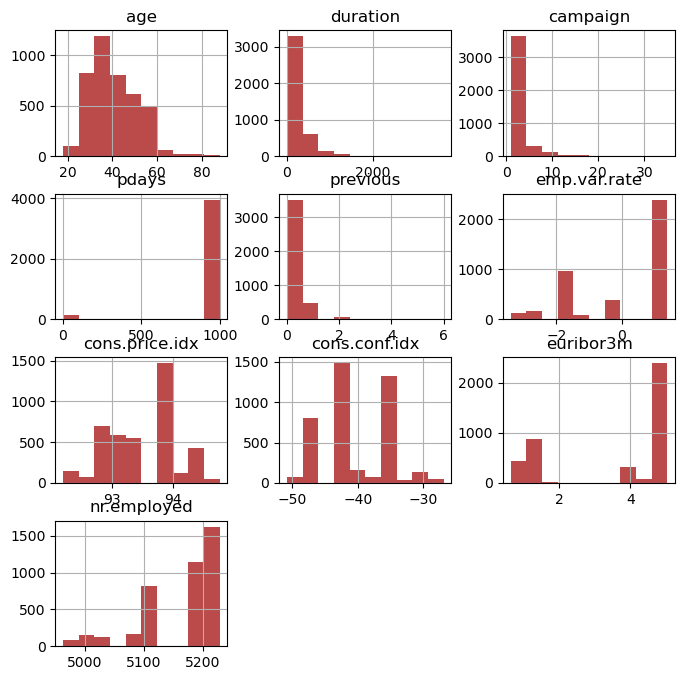

In [233]:
df.hist(figsize=(8,8),color='#BB4A4A')

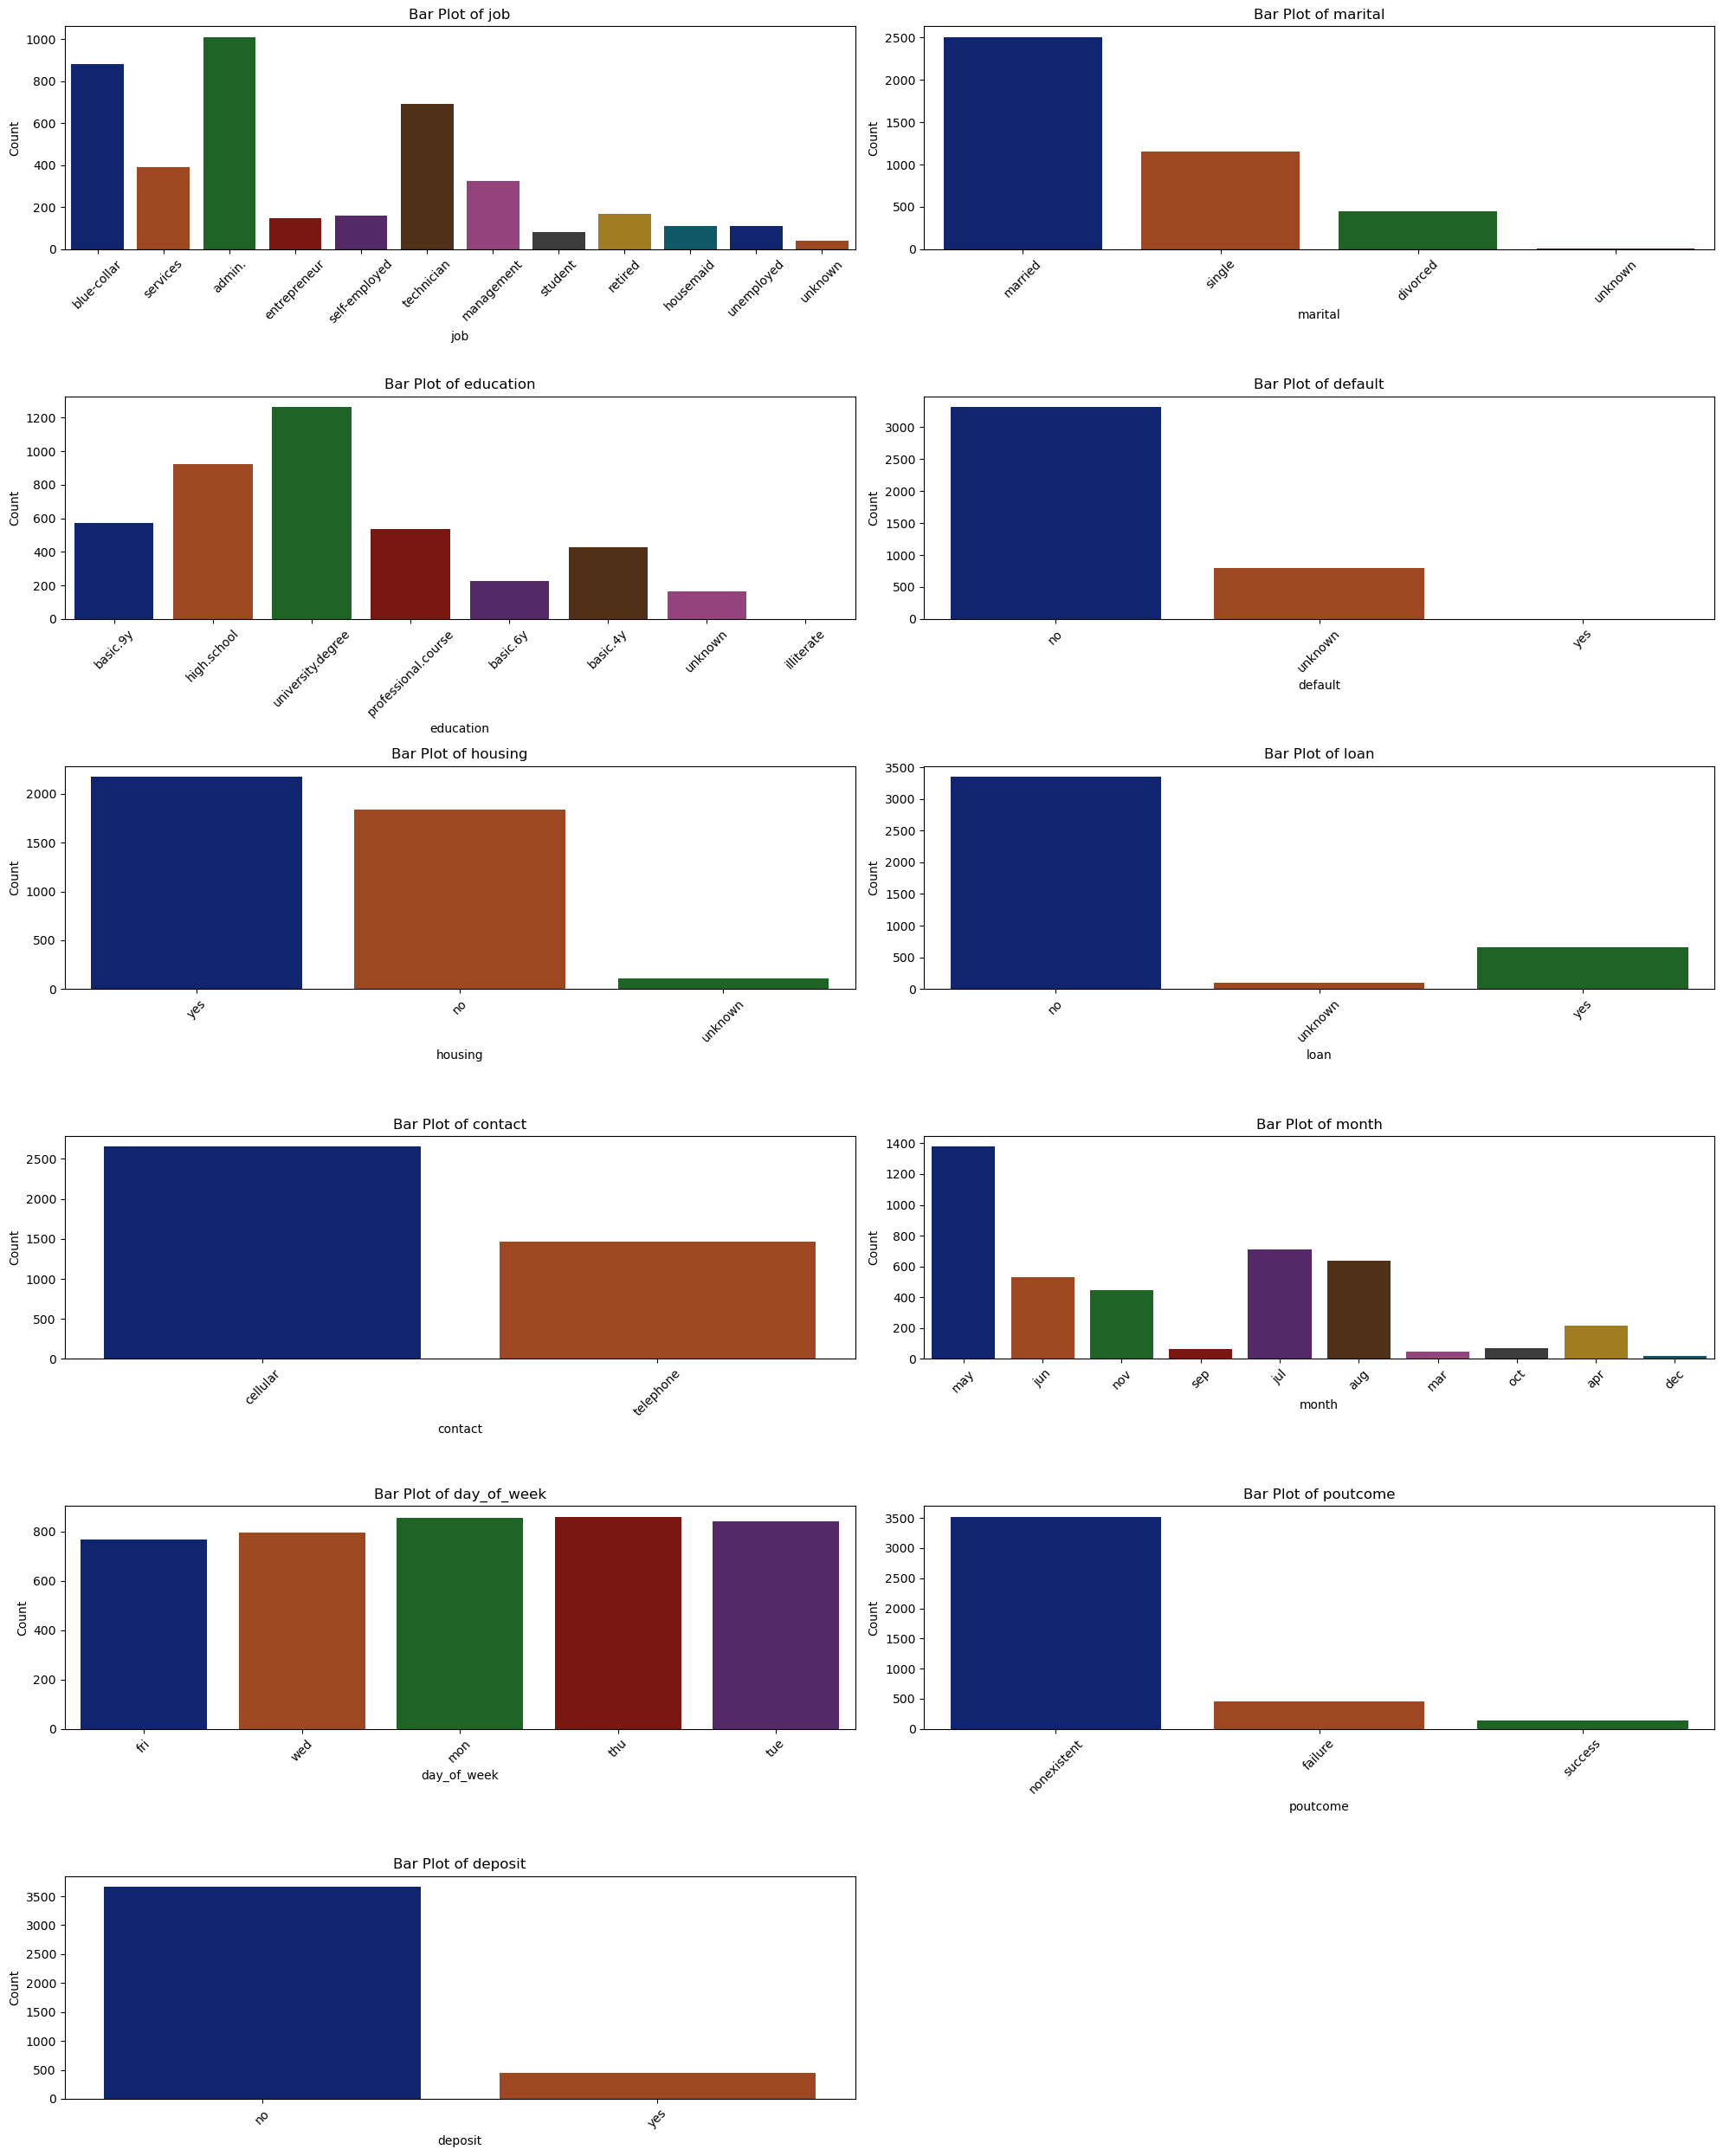

In [234]:
num_plots=len(categorical_cols)
num_rows=(num_plots+1)//2
num_cols=2
plt.figure(figsize=(20,25))
for i,feature in enumerate(categorical_cols,1):
    plt.subplot(num_rows,num_cols,i)
    sns.countplot(x=feature,data=df,palette='dark')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()

age                  Axes(0.125,0.53;0.133621x0.35)
duration          Axes(0.285345,0.53;0.133621x0.35)
campaign           Axes(0.44569,0.53;0.133621x0.35)
pdays             Axes(0.606034,0.53;0.133621x0.35)
previous          Axes(0.766379,0.53;0.133621x0.35)
emp.var.rate         Axes(0.125,0.11;0.133621x0.35)
cons.price.idx    Axes(0.285345,0.11;0.133621x0.35)
cons.conf.idx      Axes(0.44569,0.11;0.133621x0.35)
euribor3m         Axes(0.606034,0.11;0.133621x0.35)
nr.employed       Axes(0.766379,0.11;0.133621x0.35)
dtype: object

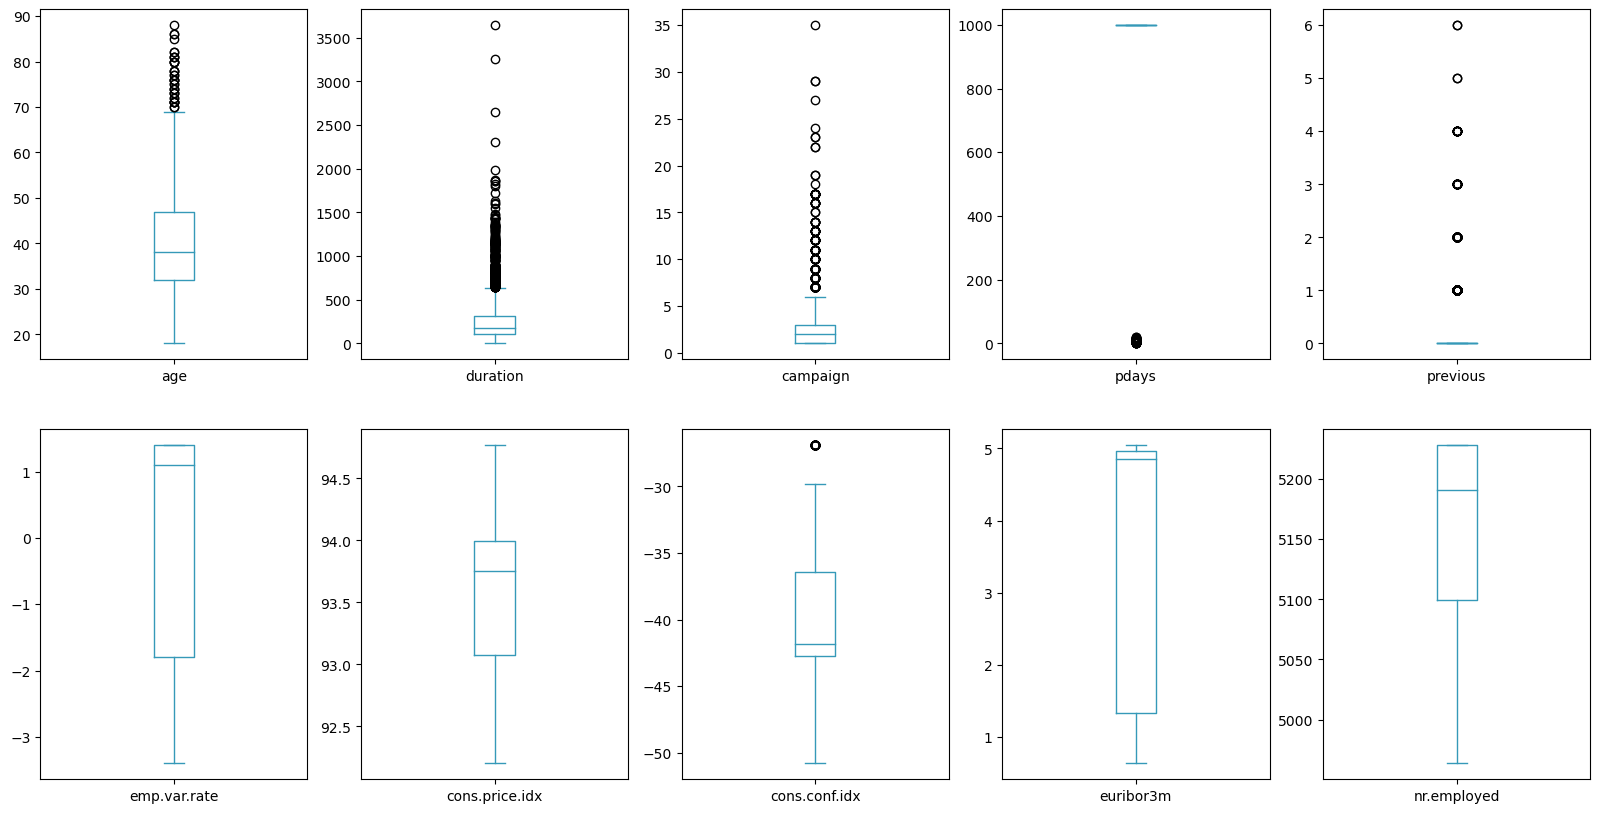

In [235]:
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,10),color='#3599B8')

# Removing the Outliers interquartile Range (IQR) method

In [236]:
columns = ['age', 'campaign', 'duration','cons.conf.idx']

# Loop through each column and apply IQR filtering
for col in columns:
    q1 = np.percentile(df[col], 25)  # First quartile (Q1)
    q3 = np.percentile(df[col], 75)  # Third quartile (Q3)
    iqr = q3 - q1  # Interquartile range (IQR)
    
    lower_bound = q1 - 1.5 * iqr  # Lower bound for outliers
    upper_bound = q3 + 1.5 * iqr  # Upper bound for outliers
    
    # Filter out values that fall outside the bounds
    df[col] = np.where((df[col] > lower_bound) & (df[col] < upper_bound), df[col], np.nan)

age                  Axes(0.125,0.53;0.133621x0.35)
duration          Axes(0.285345,0.53;0.133621x0.35)
campaign           Axes(0.44569,0.53;0.133621x0.35)
pdays             Axes(0.606034,0.53;0.133621x0.35)
previous          Axes(0.766379,0.53;0.133621x0.35)
emp.var.rate         Axes(0.125,0.11;0.133621x0.35)
cons.price.idx    Axes(0.285345,0.11;0.133621x0.35)
cons.conf.idx      Axes(0.44569,0.11;0.133621x0.35)
euribor3m         Axes(0.606034,0.11;0.133621x0.35)
nr.employed       Axes(0.766379,0.11;0.133621x0.35)
dtype: object

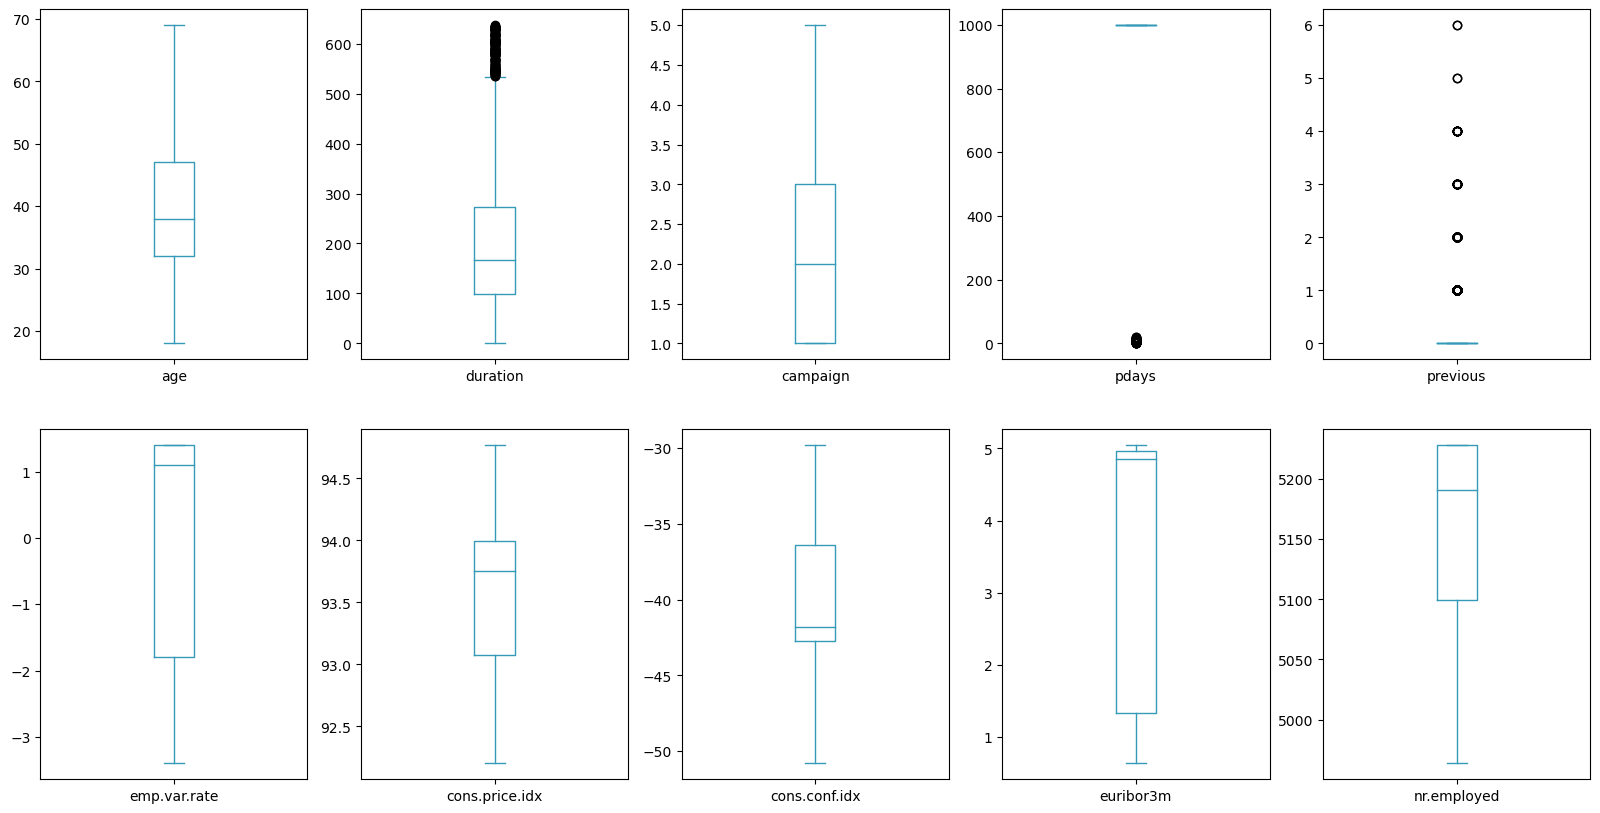

In [237]:
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,10),color='#3599B8')

# Feature Selection

                     age  duration  campaign     pdays  previous  \
age             1.000000  0.015768  0.009590 -0.004544  0.003248   
duration        0.015768  1.000000 -0.056510 -0.068298  0.064981   
campaign        0.009590 -0.056510  1.000000  0.045584 -0.066993   
pdays          -0.004544 -0.068298  0.045584  1.000000 -0.587941   
previous        0.003248  0.064981 -0.066993 -0.587941  1.000000   
emp.var.rate    0.031497 -0.060465  0.109225  0.270684 -0.415238   
cons.price.idx  0.015600  0.000449  0.092988  0.058472 -0.164922   
cons.conf.idx   0.082703 -0.028340  0.000198 -0.084829 -0.069815   
euribor3m       0.041180 -0.073615  0.093136  0.301478 -0.458851   
nr.employed     0.027887 -0.089585  0.094727  0.381983 -0.514853   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                 0.031497        0.015600       0.082703   0.041180   
duration           -0.060465        0.000449      -0.028340  -0.073615   
campaign            0.109225 

<Axes: >

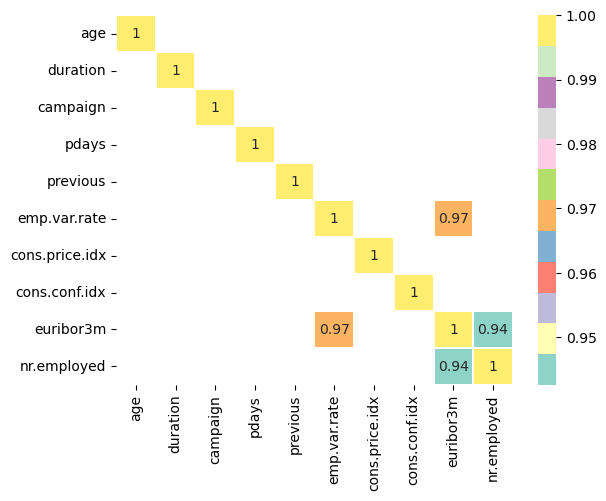

In [238]:
numeric_df=df.drop(columns=categorical_cols)
corr=numeric_df.corr()
print(corr)
corr=corr[abs(corr)>=0.90]
sns.heatmap(corr,annot=True,cmap='Set3',linewidths=0.2)

**Removing Highly Correlated Columns to avoid Overfitting**

In [239]:
high_corr_cols=['emp.var.rate','euribor3m','nr.employed']

In [242]:
df1=df.copy()
print(df1.shape[1])
df1.columns

21


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [243]:
df1.drop(high_corr_cols,inplace=True,axis=1)
df1.columns
print(df1.shape[1])

18


# Label Encoding for Ordinal Categorical Data

In [244]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df_encoded=df1.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,deposit
0,12,1,1,2,0,2,0,0,6,0,474,1,20,0,1,8,4,0
1,21,7,2,3,0,0,0,1,6,0,343,3,20,0,1,18,16,0
2,7,7,1,3,0,2,0,1,4,4,224,0,20,0,1,23,8,0
3,20,7,1,2,0,1,1,1,4,0,14,2,20,0,1,23,8,0
4,29,0,1,6,0,2,0,0,7,1,55,0,20,0,1,11,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,12,0,1,1,0,2,2,0,3,2,50,0,20,0,1,17,6,0
4115,21,0,1,3,0,2,0,1,3,0,216,0,20,0,1,17,6,0
4116,9,8,2,3,0,0,0,0,6,1,61,1,20,1,0,8,4,0
4117,40,0,1,3,0,0,0,0,1,0,510,0,20,0,1,13,17,0


In [245]:
df_encoded.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,deposit
0,12,1,1,2,0,2,0,0,6,0,474,1,20,0,1,8,4,0
1,21,7,2,3,0,0,0,1,6,0,343,3,20,0,1,18,16,0
2,7,7,1,3,0,2,0,1,4,4,224,0,20,0,1,23,8,0
3,20,7,1,2,0,1,1,1,4,0,14,2,20,0,1,23,8,0
4,29,0,1,6,0,2,0,0,7,1,55,0,20,0,1,11,7,0


# Splitting the data into Target and the Feature Columns

In [246]:
df_encoded['deposit'].value_counts()

deposit
0    3668
1     451
Name: count, dtype: int64

In [247]:
x=df_encoded.drop('deposit',axis=1)
y=df_encoded['deposit']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(4119, 17)
(4119,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [248]:
y #Target Column

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: deposit, Length: 4119, dtype: int32

In [249]:
print(x.columns)#Feature Columns
x.shape[1]

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')


17

# Splitting the Feature and the Target Columns into Train and Test data

In [250]:
from sklearn.model_selection import train_test_split

In [251]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3089, 17)
(1030, 17)
(3089,)
(1030,)


In [252]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
def eval_model(y_test,y_pred):
    acc=accuracy_score(y_test,y_pred)
    print("Accuracy_Score",acc)
    cm=confusion_matrix(y_test,y_pred)
    print("Confusion Matrix",cm)
    print("Classification Report:\n",classification_report(y_test,y_pred))
def mscore(model):
    train_score=model.score(x_train,y_train)
    test_score=model.score(x_test,y_test)
    print("Training Score:",train_score)
    print("Testing Score:",test_score)

# Decision Tree

**Constructing a Decision Tree Using gini Function To Measure the Quality of Split**

In [253]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [254]:
mscore(dt)

Training Score: 0.9177727419876983
Testing Score: 0.9087378640776699


In [255]:
ypred_dt=dt.predict(x_test)
print(ypred_dt)

[0 0 1 ... 0 0 0]


In [256]:
eval_model(y_test,ypred_dt)

Accuracy_Score 0.9087378640776699
Confusion Matrix [[913  17]
 [ 77  23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       930
           1       0.57      0.23      0.33       100

    accuracy                           0.91      1030
   macro avg       0.75      0.61      0.64      1030
weighted avg       0.89      0.91      0.89      1030



In [257]:
from sklearn.tree import plot_tree

In [258]:
cn=['No','Yes'] #Defining the Class Names
fn=x_train.columns #Feature Names
print("Feature Names:\n",fn)
print("Class Names:\n",cn)

Feature Names:
 Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')
Class Names:
 ['No', 'Yes']


[Text(0.532608695652174, 0.9166666666666666, 'x[10] <= 448.5\ngini = 0.201\nsamples = 3089\nvalue = [2738, 351]\nclass = No'),
 Text(0.28804347826086957, 0.75, 'x[12] <= 9.5\ngini = 0.12\nsamples = 2652\nvalue = [2482, 170]\nclass = No'),
 Text(0.11956521739130435, 0.5833333333333334, 'x[16] <= 11.5\ngini = 0.452\nsamples = 87\nvalue = [30, 57]\nclass = Yes'),
 Text(0.043478260869565216, 0.4166666666666667, 'x[10] <= 231.0\ngini = 0.444\nsamples = 24\nvalue = [16, 8]\nclass = No'),
 Text(0.021739130434782608, 0.25, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]\nclass = No'),
 Text(0.06521739130434782, 0.25, 'x[1] <= 2.0\ngini = 0.444\nsamples = 12\nvalue = [4, 8]\nclass = Yes'),
 Text(0.043478260869565216, 0.08333333333333333, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = No'),
 Text(0.08695652173913043, 0.08333333333333333, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]\nclass = Yes'),
 Text(0.1956521739130435, 0.4166666666666667, 'x[10] <= 171.5\ngini = 0.346\nsamples = 63\nvalue = [1

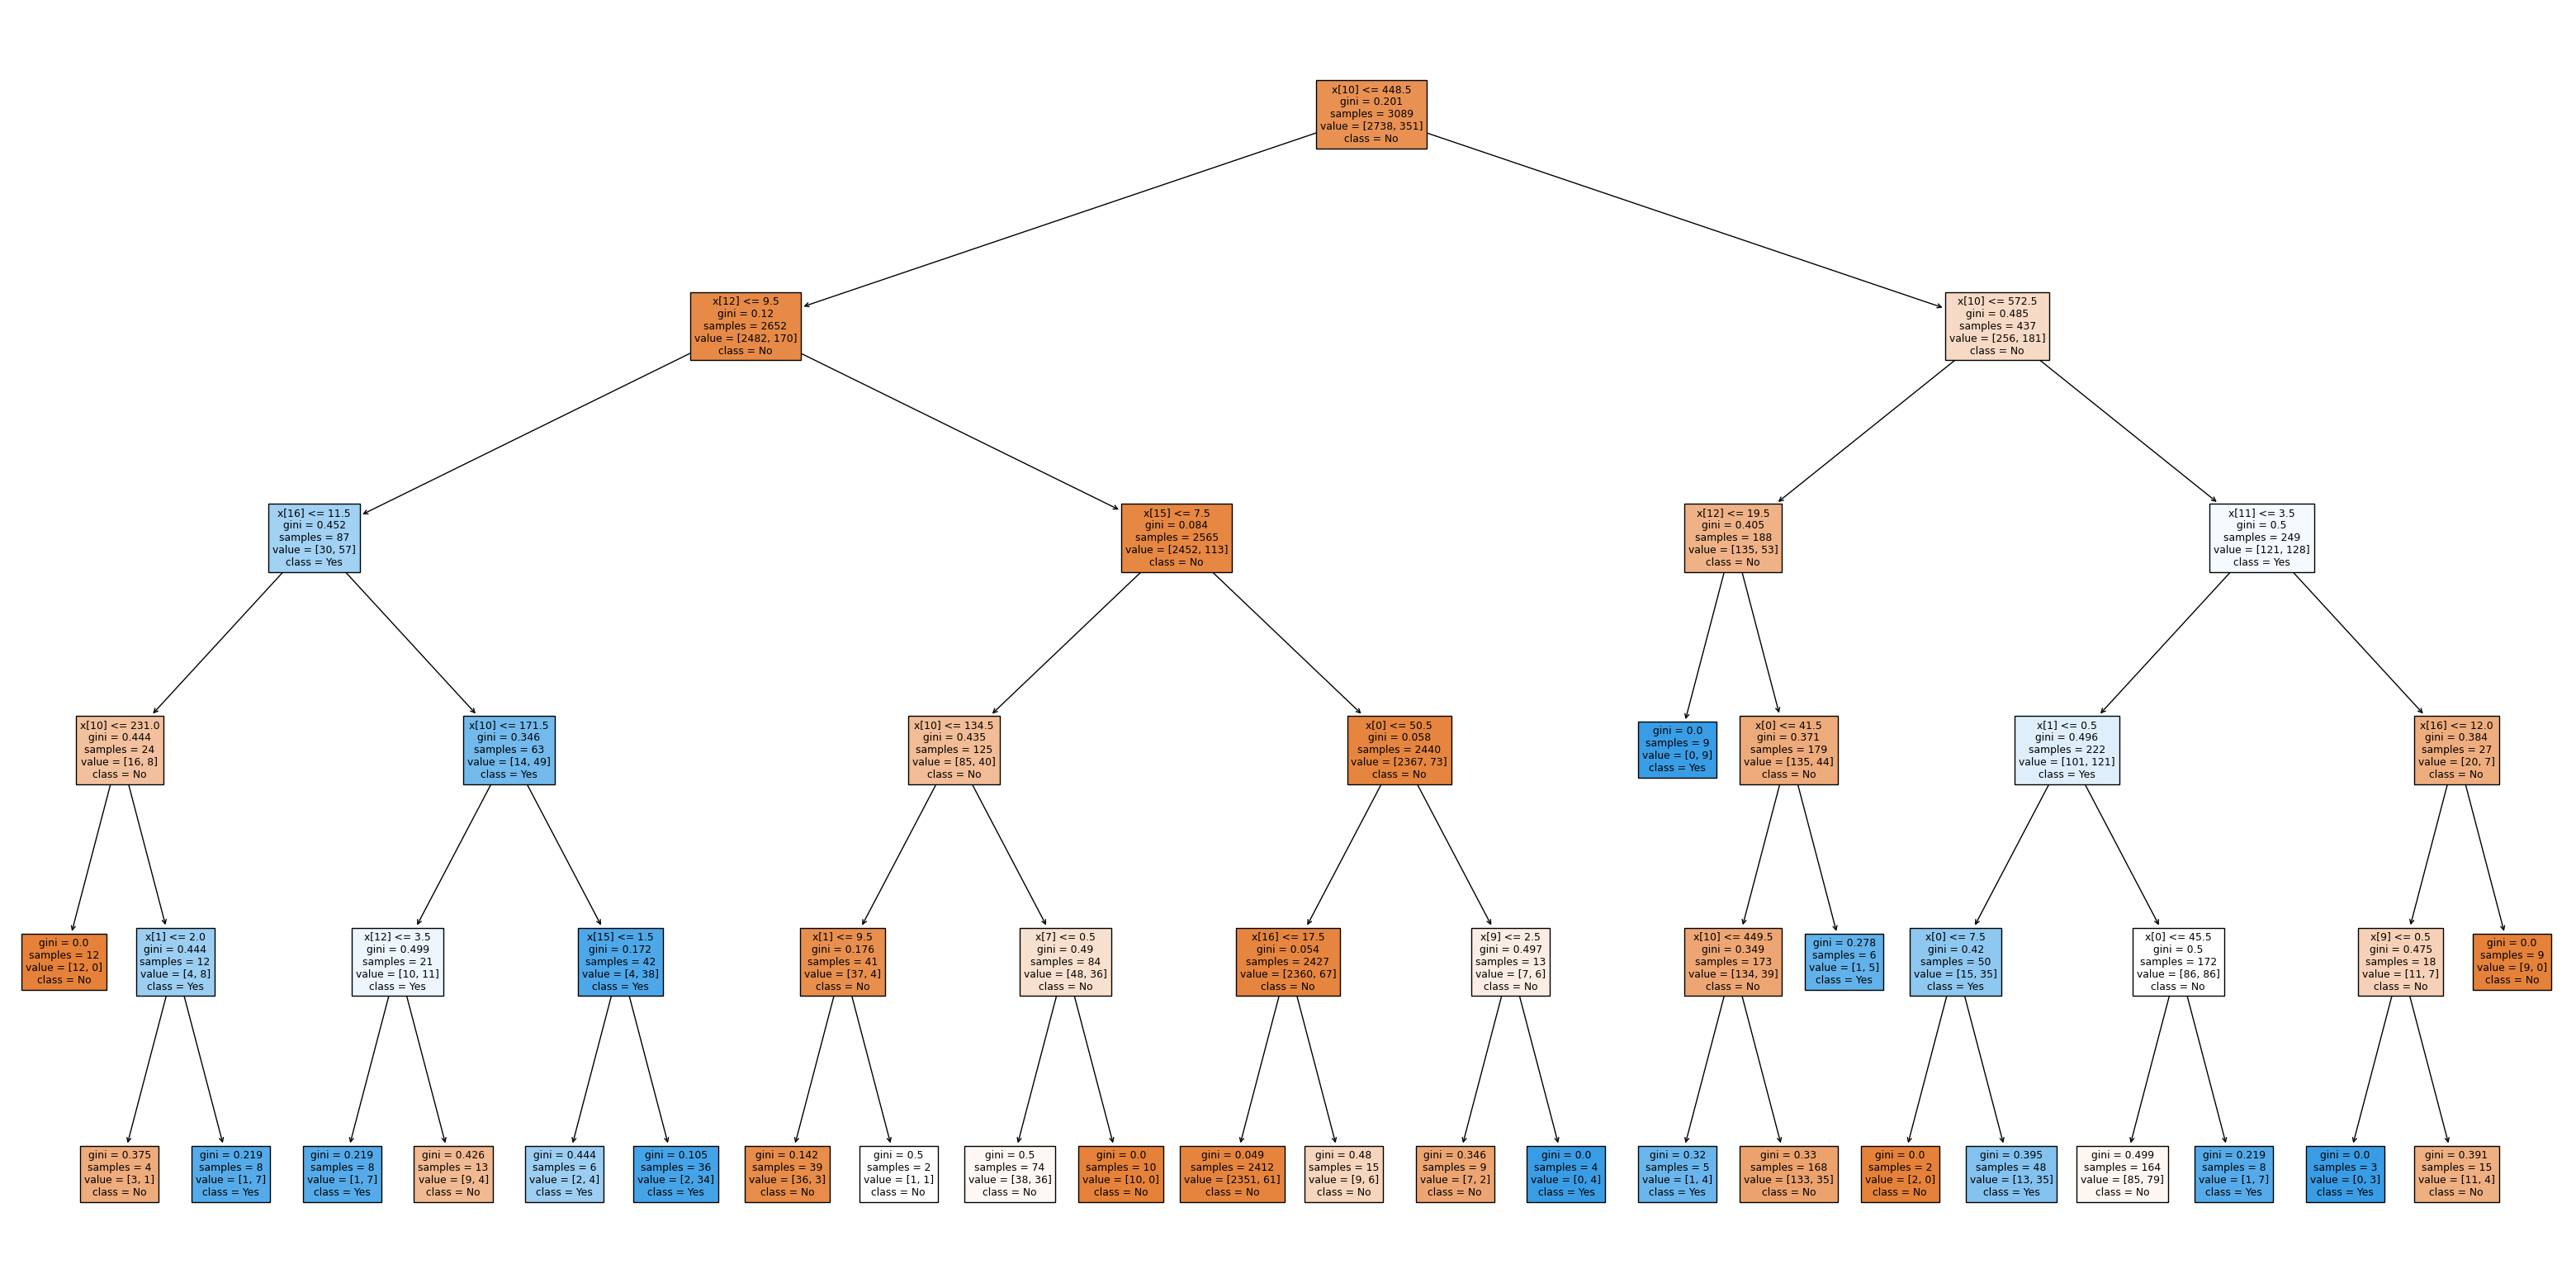

In [259]:
plt.figure(figsize=(40,20))
plot_tree(dt,class_names=cn,filled=True)

**Construction Decision Tree Using Entropy Function to Measure the Quality of Split**

In [260]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [261]:
mscore(dt1)

Training Score: 0.9087083198446099
Testing Score: 0.9106796116504854


In [262]:
ypred_dt1=dt1.predict(x_test)
print(ypred_dt1)

[0 0 1 ... 0 0 0]


In [263]:
eval_model(y_test,ypred_dt1)

Accuracy_Score 0.9106796116504854
Confusion Matrix [[911  19]
 [ 73  27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       930
           1       0.59      0.27      0.37       100

    accuracy                           0.91      1030
   macro avg       0.76      0.62      0.66      1030
weighted avg       0.89      0.91      0.90      1030



[Text(0.5, 0.9, 'x[10] <= 397.5\nentropy = 0.511\nsamples = 3089\nvalue = [2738, 351]\nclass = No'),
 Text(0.25, 0.7, 'x[12] <= 9.5\nentropy = 0.326\nsamples = 2567\nvalue = [2414, 153]\nclass = No'),
 Text(0.125, 0.5, 'x[10] <= 256.0\nentropy = 0.927\nsamples = 79\nvalue = [27, 52]\nclass = Yes'),
 Text(0.0625, 0.3, 'x[16] <= 11.5\nentropy = 0.998\nsamples = 53\nvalue = [25, 28]\nclass = Yes'),
 Text(0.03125, 0.1, 'entropy = 0.567\nsamples = 15\nvalue = [13, 2]\nclass = No'),
 Text(0.09375, 0.1, 'entropy = 0.9\nsamples = 38\nvalue = [12, 26]\nclass = Yes'),
 Text(0.1875, 0.3, 'x[12] <= 7.5\nentropy = 0.391\nsamples = 26\nvalue = [2, 24]\nclass = Yes'),
 Text(0.15625, 0.1, 'entropy = 0.0\nsamples = 20\nvalue = [0, 20]\nclass = Yes'),
 Text(0.21875, 0.1, 'entropy = 0.918\nsamples = 6\nvalue = [2, 4]\nclass = Yes'),
 Text(0.375, 0.5, 'x[15] <= 7.5\nentropy = 0.245\nsamples = 2488\nvalue = [2387, 101]\nclass = No'),
 Text(0.3125, 0.3, 'x[10] <= 134.5\nentropy = 0.874\nsamples = 119\nvalue

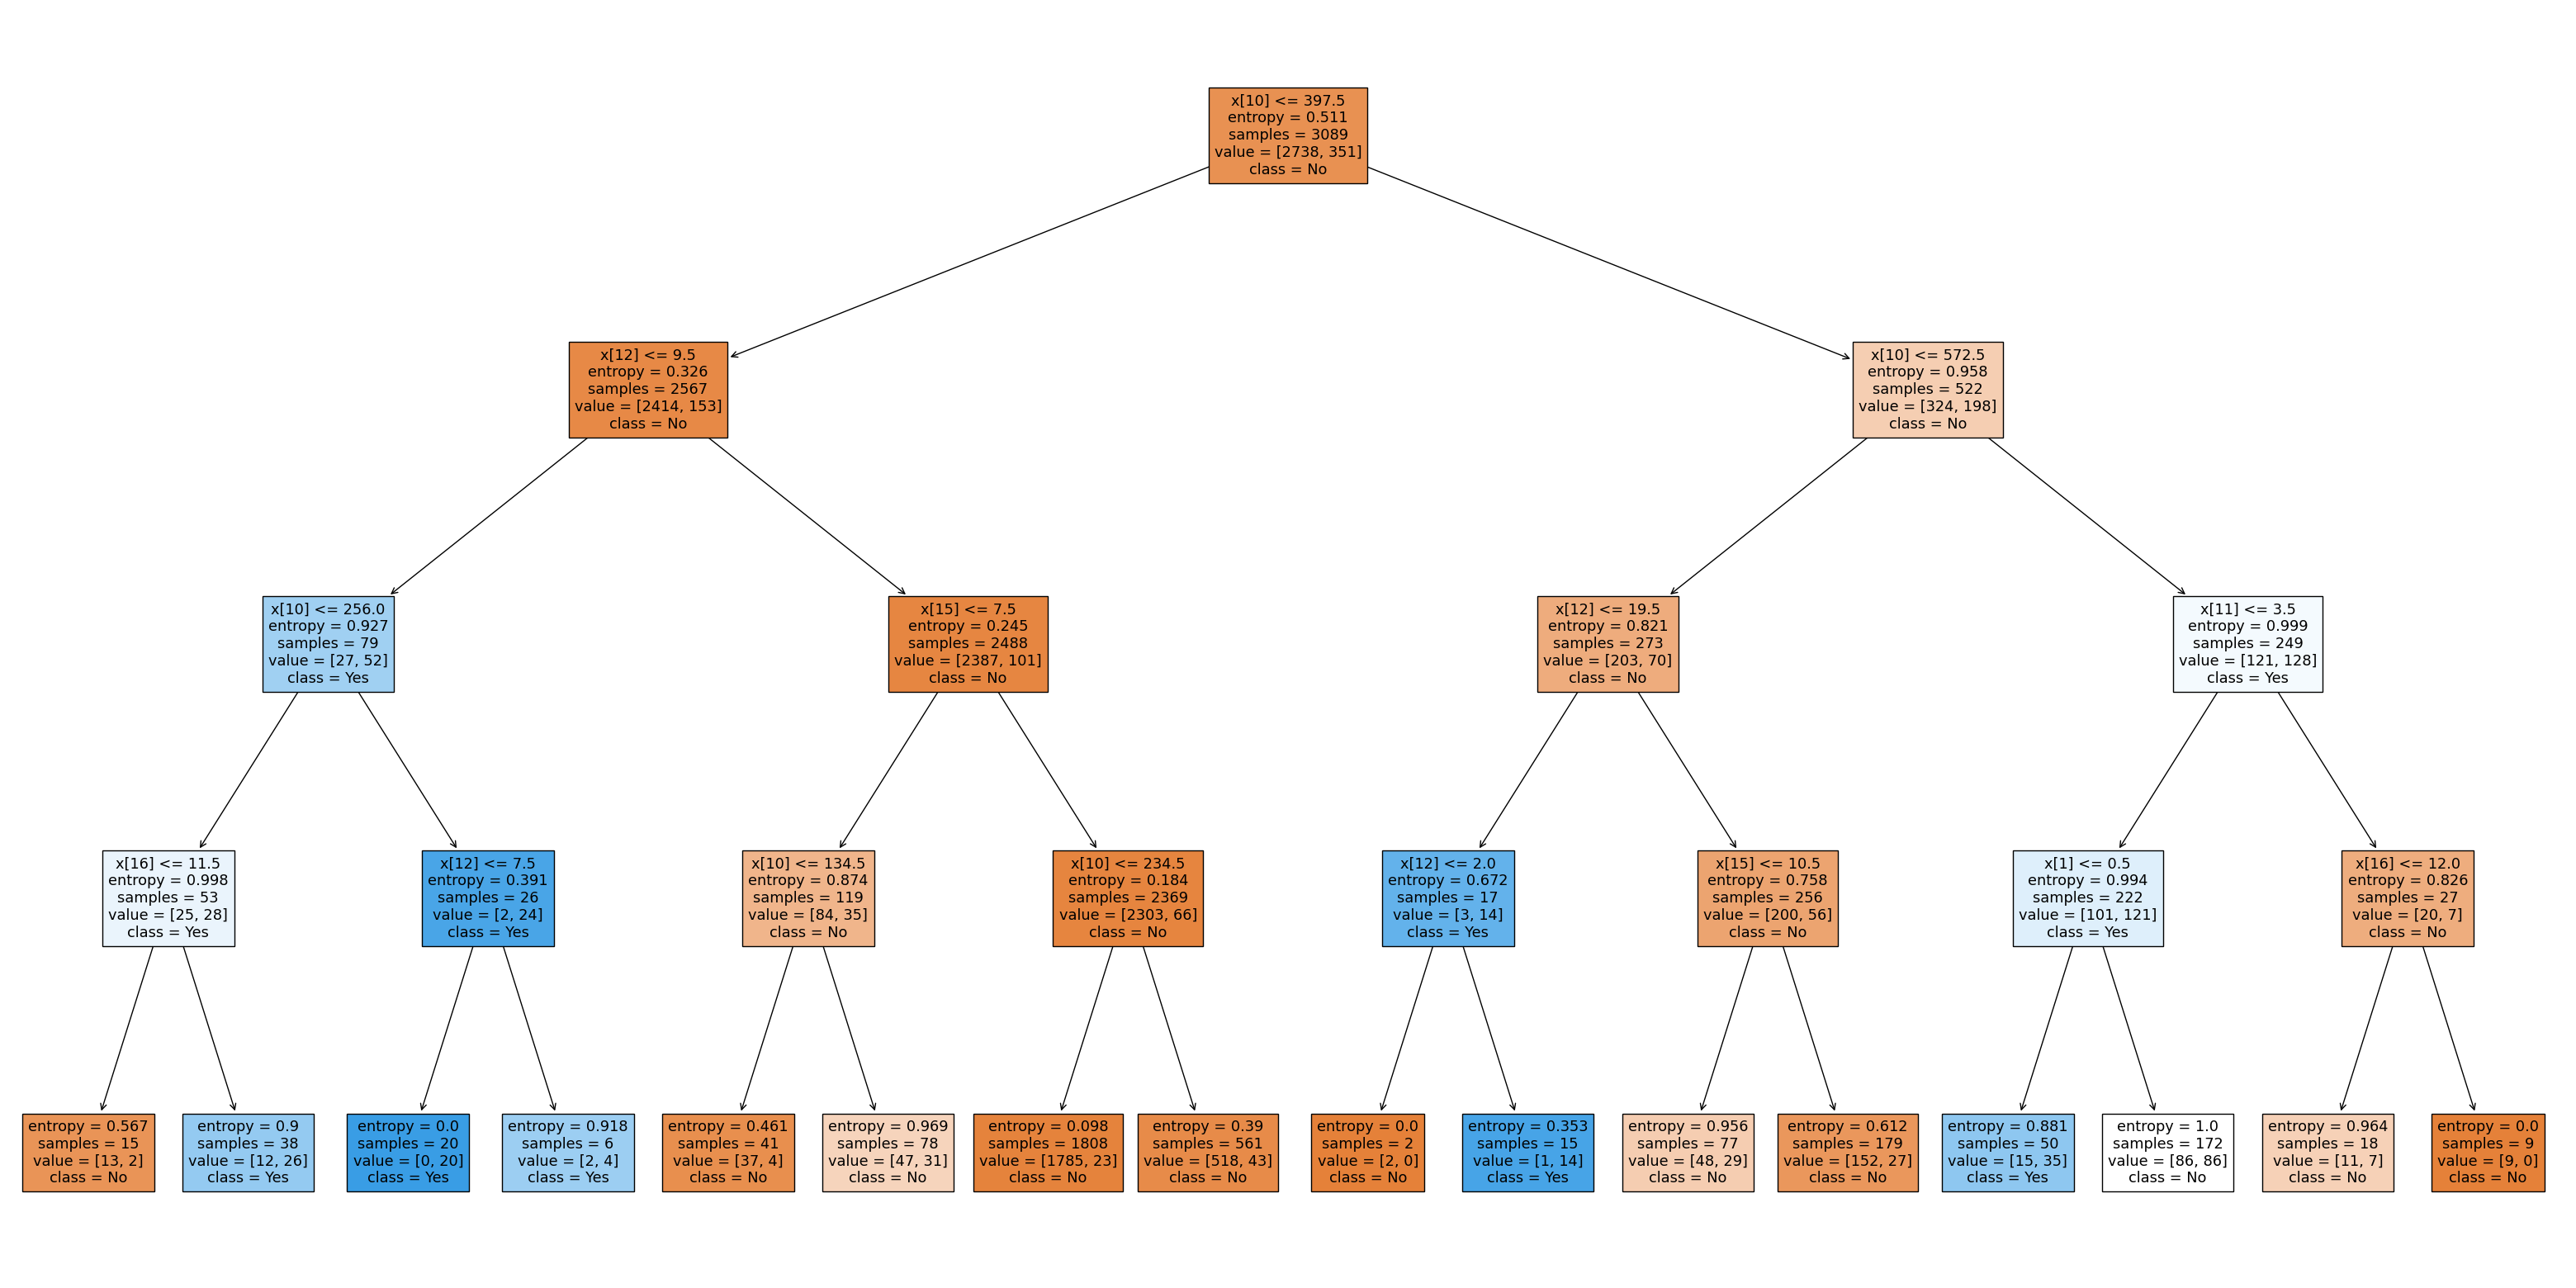

In [264]:
plt.figure(figsize=(40,20))
plot_tree(dt1,class_names=cn,filled=True)